## Importing Essential Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

## Loading the rice dataset from uci repo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes), let's convert to numpy
X = rice_cammeo_and_osmancik.data.features.to_numpy()
y = rice_cammeo_and_osmancik.data.targets.to_numpy()



### Converting y to a 1D array

In [3]:
y = y.ravel()

## Splitting the dataset into the Training and Test sets

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling
we scale the features so they're in the same range

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
print(f"X and y shapes: {X.shape}, {y.shape}")

X and y shapes: (3810, 7), (3810,)


## Training the K-NN model on the Training set

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

## Insample Prediction: on training data

In [8]:
y_pred_ins = classifier.predict(X_train)
#print(np.concatenate((y_pred_ins.reshape(len(y_pred_ins),1), y_train.reshape(len(y_train),1)),1))

### Let's see the confusion matrix and accuracy score

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_ins)
print(cm)
accuracy_score(y_train, y_pred_ins)

[[1162   55]
 [ 139 1501]]


0.9320966048302415

## Insample Prediction: on training data and confusion matrix

In [10]:
y_pred_out = classifier.predict(X_test)

In [11]:
cm = confusion_matrix(y_test, y_pred_out)
print(cm)
accuracy_score(y_test, y_pred_out)

[[380  33]
 [ 40 500]]


0.9233997901364114

# Learning Curve
## Experiment to run with different values of k and observe the accuracy.

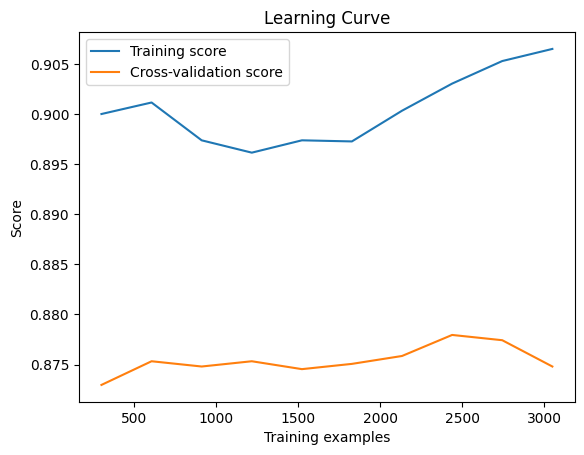

In [103]:
from sklearn.model_selection import learning_curve

model = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=0, shuffle=True)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()

In [104]:
# print(train_sizes)
# print(train_scores)
# print("Test scores \n", test_scores)


## Experimenting with different values of k

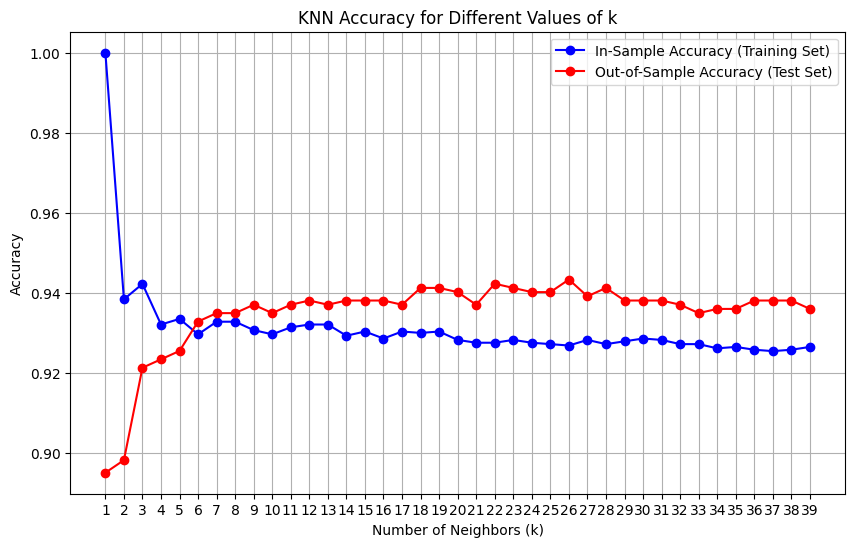

In [105]:
k_vals = [i for i in range(1,40)]
train_accuracies = []
test_accuracies = []
for k in k_vals:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)

    y_pred_test = classifier.predict(X_test)
    y_pred_train = classifier.predict(X_train)
    
    train_accuracies.append(accuracy_score(y_train, y_pred_train))
    test_accuracies.append(accuracy_score(y_test, y_pred_test))


# now let's plot it - Accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_vals, train_accuracies, label='In-Sample Accuracy (Training Set)', marker='o', color='b')
plt.plot(k_vals, test_accuracies, label='Out-of-Sample Accuracy (Test Set)', marker='o', color='r')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_vals)
plt.legend()
plt.grid(True)
plt.show()

In [106]:
print(train_accuracies)
print(test_accuracies)

[1.0, 0.9383969198459923, 0.9422471123556178, 0.9320966048302415, 0.9334966748337417, 0.9296464823241162, 0.9327966398319916, 0.9327966398319916, 0.9306965348267413, 0.9296464823241162, 0.9313965698284914, 0.9320966048302415, 0.9320966048302415, 0.9292964648232411, 0.9303465173258663, 0.928596429821491, 0.9303465173258663, 0.9299964998249912, 0.9303465173258663, 0.928246412320616, 0.9275463773188659, 0.9275463773188659, 0.928246412320616, 0.9275463773188659, 0.9271963598179909, 0.9268463423171158, 0.928246412320616, 0.9271963598179909, 0.927896394819741, 0.928596429821491, 0.928246412320616, 0.9271963598179909, 0.9271963598179909, 0.9261463073153657, 0.9264963248162408, 0.9257962898144907, 0.9254462723136156, 0.9257962898144907, 0.9264963248162408]
[0.8950682056663168, 0.8982161594963274, 0.9213011542497377, 0.9233997901364114, 0.925498426023085, 0.9328436516264428, 0.9349422875131165, 0.9349422875131165, 0.9370409233997902, 0.9349422875131165, 0.9370409233997902, 0.938090241343127, 0.